<a href="https://colab.research.google.com/github/LTCrazy/CDL-prereq/blob/main/CDL_Tensorflow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

The label is 3


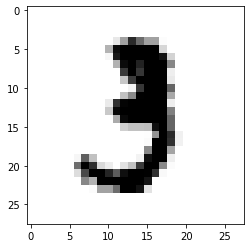

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 10
print('The label is', y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
# Rotate images by 180 degrees
!pip install tensorflow_addons
import tensorflow_addons as tfa
import math
import numpy as np
x_train_aug = tfa.image.transform_ops.rotate(x_train, math.pi)
x_test_aug = tfa.image.transform_ops.rotate(x_test, math.pi)
print('x_train_aug shape', x_train_aug.shape)
x_train = np.append(x_train, x_train_aug, axis = 0)
x_test = np.append(x_test, x_test_aug, axis = 0)
print('x_train shape:', x_train.shape)

x_train_aug shape (60000, 28, 28, 1)
x_train shape: (120000, 28, 28, 1)


labels range from 0 to 9 
labels range from 0 to 1 
y_train shape: (120000,)


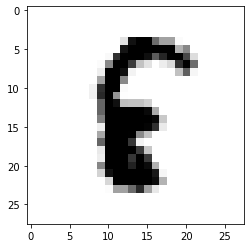

In [20]:
# Convert labels of '0-9' to '0-1' to represent odd and even
print('labels range from %d to %d ' % (min(y_train), max(y_train)))
y_train %= 2
y_test %= 2
# y_train = [0 if y_train.all() % 2 == 0 else 1]
print('labels range from %d to %d ' % (min(y_train), max(y_train)))
# Duplicate labels for augmented images
y_train = np.append(y_train, y_train)
y_test = np.append(y_test, y_test)
print('y_train shape:', y_train.shape)
plt.imshow(np.array(x_train_aug[image_index]).squeeze(axis=2), cmap='Greys')

In [21]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(2,activation=tf.nn.softmax))

In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
3750/3750 [==============================] - 69s 18ms/step - loss: 0.1209 - accuracy: 0.9540
Epoch 2/10
3750/3750 [==============================] - 63s 17ms/step - loss: 0.0613 - accuracy: 0.9784
Epoch 3/10
3750/3750 [==============================] - 62s 17ms/step - loss: 0.0485 - accuracy: 0.9830
Epoch 4/10
3750/3750 [==============================] - 62s 17ms/step - loss: 0.0404 - accuracy: 0.9860
Epoch 5/10
3750/3750 [==============================] - 62s 17ms/step - loss: 0.0331 - accuracy: 0.9881
Epoch 6/10
3750/3750 [==============================] - 63s 17ms/step - loss: 0.0288 - accuracy: 0.9898
Epoch 7/10
3750/3750 [==============================] - 63s 17ms/step - loss: 0.0259 - accuracy: 0.9910
Epoch 8/10
3750/3750 [==============================] - 64s 17ms/step - loss: 0.0228 - accuracy: 0.9921
Epoch 9/10
3750/3750 [==============================] - 63s 17ms/step - loss: 0.0205 - accuracy: 0.9928
Epoch 10/10
3750/3750 [==============================] - 63s 17m

In [23]:
model.evaluate(x_test, y_test)

625/625 [==============================] - 7s 10ms/step - loss: 0.0446 - accuracy: 0.9870


[0.04458404332399368, 0.9869999885559082]

predicted label:  odd


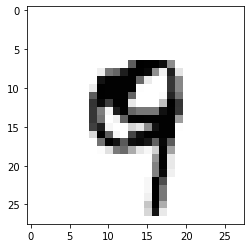

In [24]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
pred_label = 'odd' if pred.argmax() == 1 else 'even'
print('predicted label: ', pred_label)